# Worked Examples: Synoptic Exercises

These worked solutions correspond to the exercises on the [Synoptic Exercises](../working_with_data/synoptic_exercises.ipynb) page.

**How to use this notebook:**
- Try each exercise yourself first before looking at the solution
- The code cells show both the code and its output
- Download this notebook if you want to run and experiment with the code yourself
- Your solution might look different - that's fine as long as it gives the correct answer!

## Exercise 1

You have been provided with an experimental pressure/volume isotherm for SF<sub>6</sub> at 298 K in the form of a csv file.

a) Read in the experimental data using `numpy` and plot the isotherm using `matplotlib`.

In [1]:
import numpy as np

data = np.loadtxt('./sf6.csv', skiprows=1, delimiter=',')

# Let's check we have loaded the data correctly

print(f'Data shape: {data.shape}')
print(f'Number of data points: {data.shape[0]}')
print('First 5 data points:')
for row in data[:5]:
    print('---', row)

Data shape: (181, 2)
Number of data points: 181
First 5 data points:
--- [5.     4.6673]
--- [5.1    4.5699]
--- [5.2    4.4761]
--- [5.3    4.3859]
--- [5.4    4.2991]


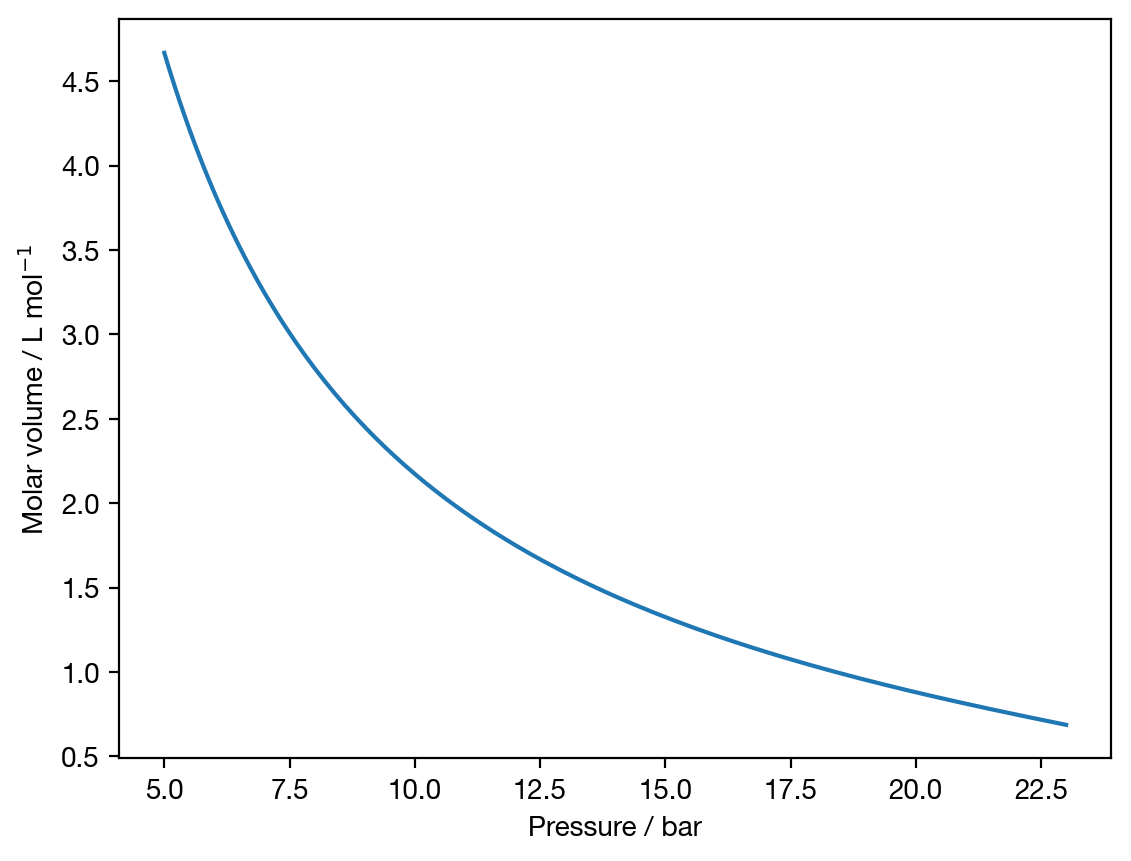

In [2]:
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

plt.plot(data[:,0], data[:,1])
plt.xlabel('Pressure / bar')
plt.ylabel('Molar volume / L mol$^{-1}$')
plt.show()

b) Assuming ideality, the isotherm should be well modelled by the ideal gas law:

$$p = \frac{RT}{v},$$

where $p$ is the pressure, $v$ is the molar volume ($V/n$), $R$ is the gas constant, and $T$ is the temperature.

Write a function to calculate the pressure with the ideal gas law and use this to model the SF<sub>6</sub> isotherm between $v = 6.87 \times 10^{-4}$ m<sup>3</sup> mol<sup>&minus;1</sup> and $v = 4.47 \times 10^-3$ m<sup>3</sup> mol<sup>&minus;1</sup>. Plot your modelled isotherm against the experimental data.

In [3]:
R = 8.314 # gas constant in J mol-1 K-1

def ideal_gas_isotherm(volume, temperature):
    """Calculate the pressure of an ideal gas.

    Args:
        volume (float): Molar volume (m^3 mol^-1)
        temperature (float): Temperature (K).

    Returns:
        pressure in Pa (float)
    """
    return R * temperature / volume

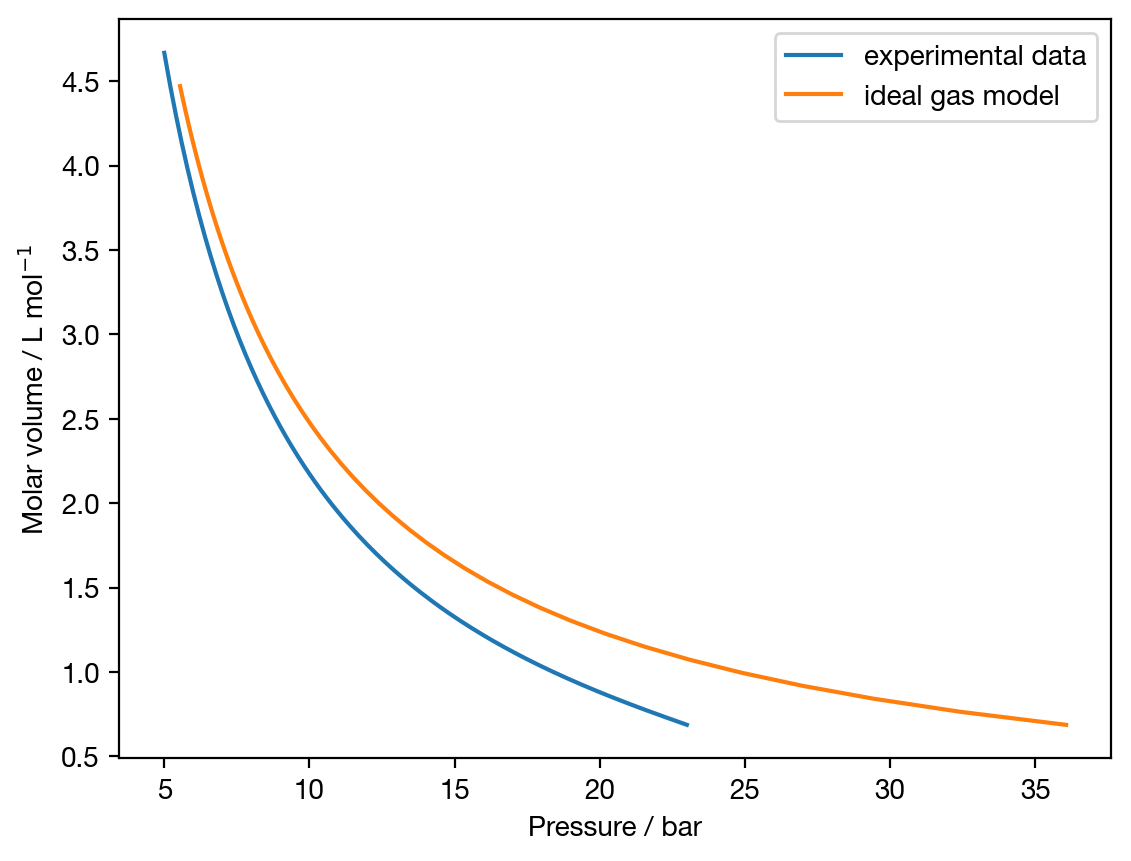

In [4]:
volumes = np.linspace(6.87e-4, 4.47e-3) # m^3 mol^-1
temperature = 298.0
model_pressures = ideal_gas_isotherm(volumes, temperature) # pressures in Pa

plt.plot(data[:,0], data[:,1], label="experimental data")
plt.plot(model_pressures / 1e5, volumes * 1e3, label="ideal gas model") 
plt.xlabel('Pressure / bar')
plt.ylabel('Molar volume / L mol$^{-1}$')
plt.legend()
plt.show()

c) Non-ideality due to intermolecular forces and other factors can be accounted for (in part) by the Van der Waals equation of state:

$$p = \frac{RT}{v-b}-\frac{a}{v^2},$$

where $p$ is the pressure, $R$ is the gas constant, $v$ is the molar volume, and $a$ and $b$ are system dependent constants that describe
the strength of the interactions and excluded volume effects respectively.

Write a function to calculate the pressure with the Van der Waals equation and use this to model the SF<sub>6</sub> isotherm, with $a=7.857 \times 10^{-1}$ m<sup>6</sup> Pa mol<sup>&minus;2</sup> and $b = 8.79 × 10^{-5}$ m<sup>3</sup> mol<sup>&minus;1</sup>
between $v = 6.87 \times 10^{-4}$ m<sup>3</sup> mol<sup>&minus;1</sup> and $v = 4.47 \times 10^-3$ m<sup>3</sup> mol<sup>&minus;1</sup>. Plot your modelled isotherm and compare this against the idealised curve and the experimental data.

In [5]:
def VdW_isotherm(volume, temperature, a, b):
    """
    Calculate the pressure of a Van der Waals gas.

    Args:
        volume (float): Molar volume (m^3 mol^-1)
        temperature (float): Temperature (K).
        a (float): TODO
        b (float): TODO

    Returns:
        pressure in Pa (float)
    """
    return R * temperature / (volume - b) - a / volume**2

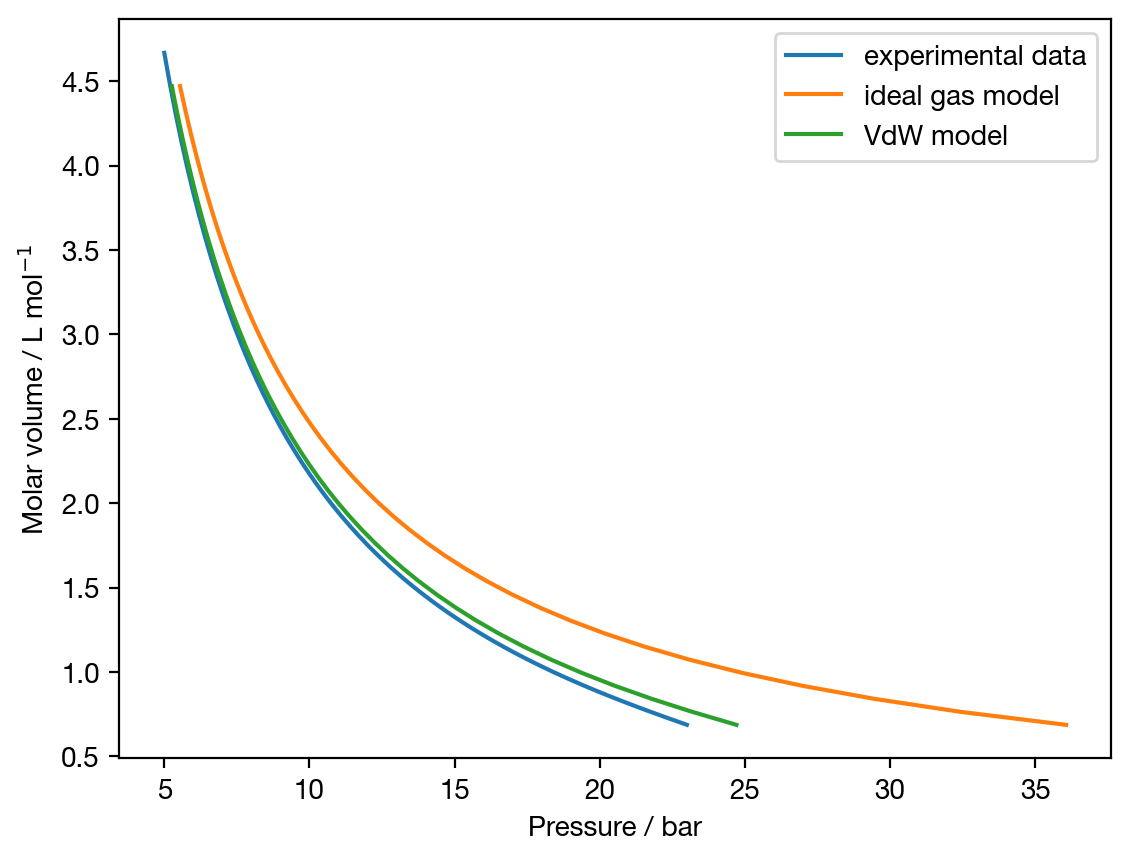

In [6]:
volumes = np.linspace(6.87e-4, 4.47e-3) # m^3 mol^-1
temperature = 298.0
a = 7.857e-1
b = 8.79e-5

vdw_model_pressures = VdW_isotherm(volumes, temperature, a, b) # pressures in Pa

plt.plot(data[:,0], data[:,1], label="experimental data")
plt.plot(model_pressures / 1e5, volumes * 1e3, label="ideal gas model") 
plt.plot(vdw_model_pressures / 1e5, volumes * 1e3, label="VdW model")
plt.xlabel('Pressure / bar')
plt.ylabel('Molar volume / L mol$^{-1}$')
plt.legend()
plt.show()

## Exercise 2

The mean activity of ions in solution can be measured experimentally. You have been provided with the mean activity of Na<sub>2</sub>SO<sub>4</sub> at 298 K for a range of ionic strengths: activity.dat.

a) Use matplotlib to render a scatter plot of the mean activity as a function of the ionic strength $I$.

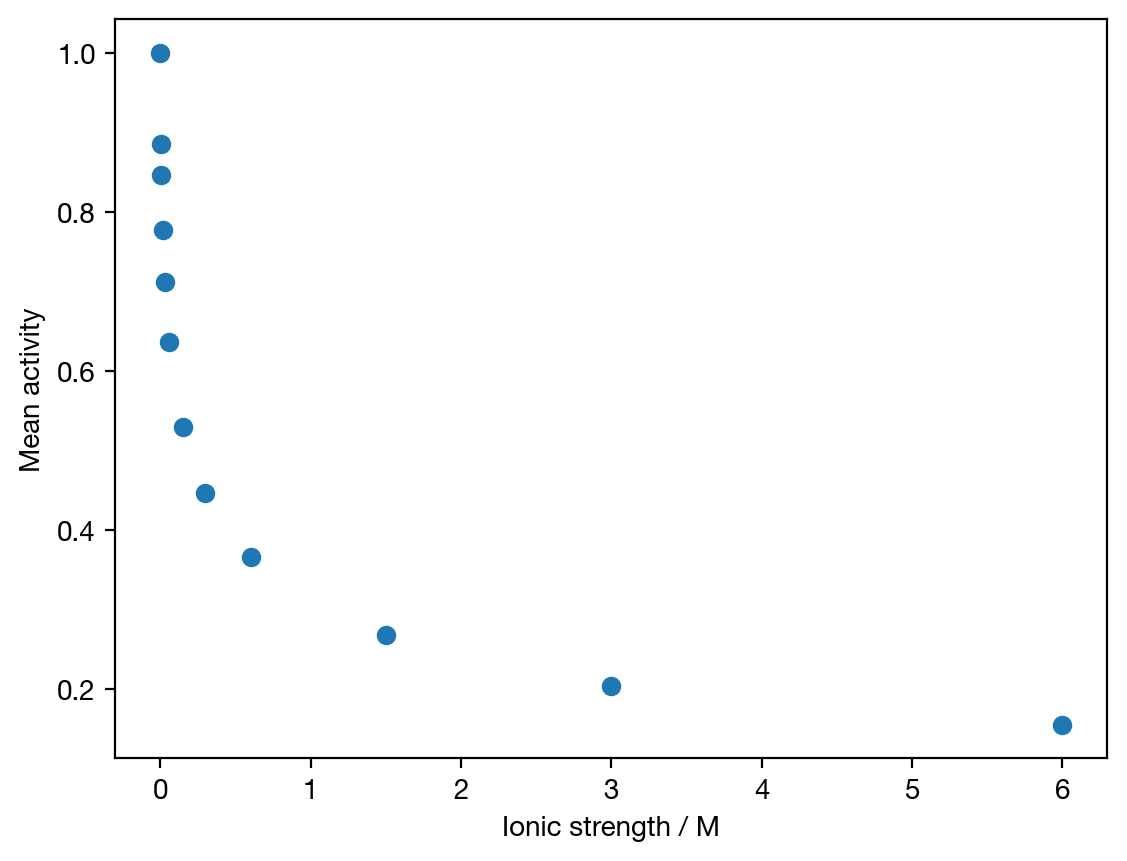

In [7]:
# Load the data
ionic_strength, mean_activity = np.loadtxt('activity.dat', skiprows=1, unpack=True)

# Plot a scatter plot
plt.plot(ionic_strength, mean_activity, 'o')
plt.xlabel('Ionic strength / M')
plt.ylabel('Mean activity')
plt.show()

b) The mean activity can be predicted by the Debye-Hückel limiting law:

$$\ln \gamma_\pm = - \left| z_+ z_-\right|A\sqrt{I},$$

where $z_+$ and $z_-$ are the charges of the cations and anions, $I$ is the ionic strength, and $A$ is a solvent and temperature-dependent constant.

Write a function to calculate the mean activity coefficient according to the Debye-Hückel limiting law.

Using $A=1.179$ M$^\frac{1}{2}$, plot the Debye-Hückel mean activity from $I = 0$ M to $I=6$ M and compare this to the experimental values.

In [8]:
def debye_huckel_limiting(I, A, z_plus, z_minus):
    """
    Calculate mean activity using Debye-Hückel limiting law.
    
    Args:
        I (float): ionic strength (M)
        A (float): solvent and temperature dependent constant
        z_plus (int): charge of cation
        z_minus (int): charge of anion
    
    Returns:
        (float) mean activity coefficient
    """
    return np.exp(-abs(z_plus * z_minus) * A * np.sqrt(I))

# For Na2SO4
z_plus = 1   # Na+ charge
z_minus = -2 # SO4^2- charge
A = 1.179    # Given constant at 298 K

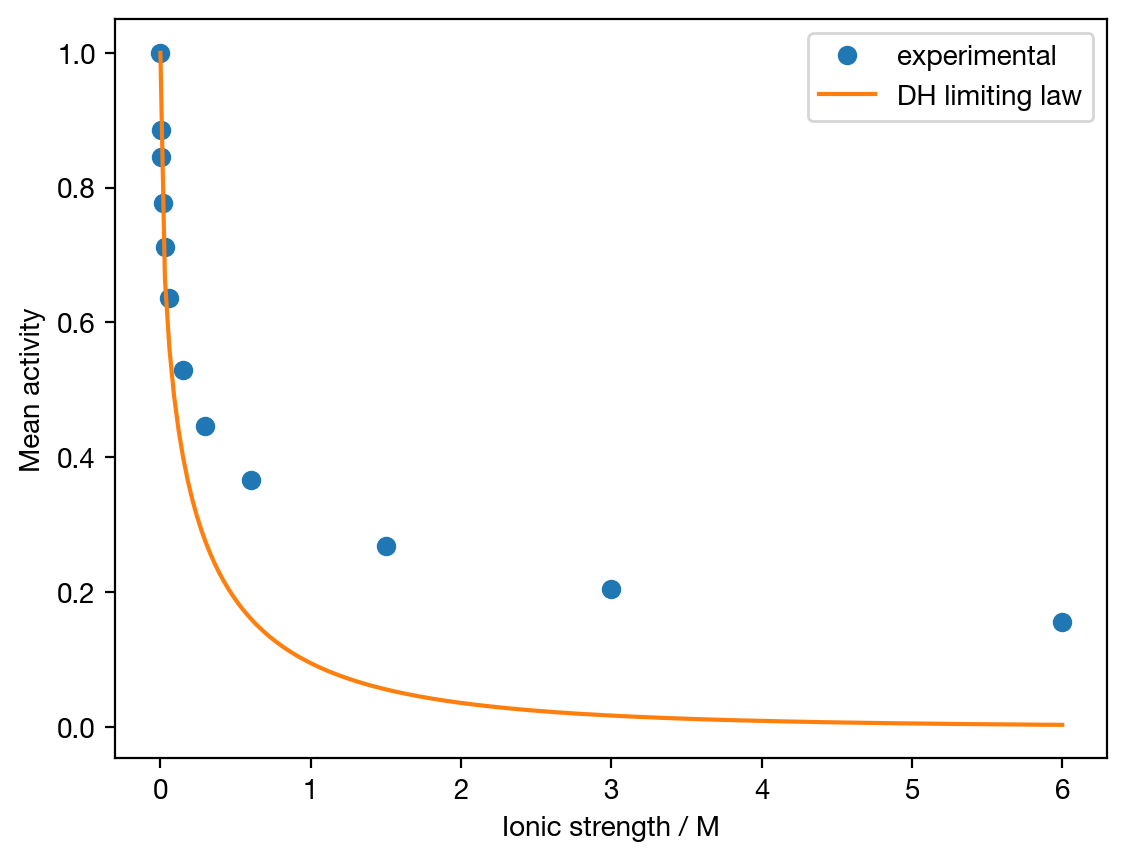

In [14]:
# Create array of ionic strengths for smooth curve
I_range = np.linspace(0, 6, 200)

# Calculate theoretical activities
gamma_DH = debye_huckel_limiting(I_range, A, z_plus, z_minus)

plt.plot(ionic_strength, mean_activity, 'o', label='experimental')
plt.plot(I_range, gamma_DH, '-', label='DH limiting law')
plt.legend()
plt.xlabel('Ionic strength / M')
plt.ylabel('Mean activity')
plt.show()

**Observations:**
- The Debye-Hückel limiting law works well at very low ionic strengths ($I < 0.01$ M)
- As ionic strength increases, the theory significantly underestimates the mean activity
- The deviation becomes severe at higher concentrations, showing the need for extended models

c) There are several extensions of the Debye–Hückel limiting law that aim to improve its description of the mean activity outside of the dilute limit. One such expression is:

$$\ln \gamma_\pm = -\left|z_+z_-\right|\frac{A\sqrt{I}}{I+Ba_0\sqrt{I}}$$

where $B$ is another solvent and temperature-dependent constant, and $a_0$ is the distance of closest approach (expected to be proportional to the closest distance between ions in solution).

Write a function to calculate the mean activity according to the extended Debye–Hückel limiting law.

Using $B = 18.3$ and $a_0 = 0.071$, plot the extended Debye–Hückel mean activity from $I=0$ M to $I=6$ M and compare this to the experimental values and the original Debye–Hückel limiting law.

In [15]:
def debye_huckel_extended(I, A, B, a0, z_plus, z_minus):
    """
    Calculate mean activity using extended Debye-Hückel equation.
    
    Args:
        I (float): ionic strength (M)
        A (float): solvent and temperature dependent constant
        B (float): another solvent and temperature dependent constant  
        a0 (float): distance of closest approach (Å)
        z_plus (int): charge of cation
        z_minus (int): charge of anion
    
    Returns:
        (float): mean activity coefficient
    """
    sqrt_I = np.sqrt(I)
    return np.exp(-abs(z_plus * z_minus) * A * sqrt_I / (1 + B * a0 * sqrt_I))
    # Convert to activity coefficient

# Given constants
B = 18.3     # Given constant
a0 = 0.071   # Given value

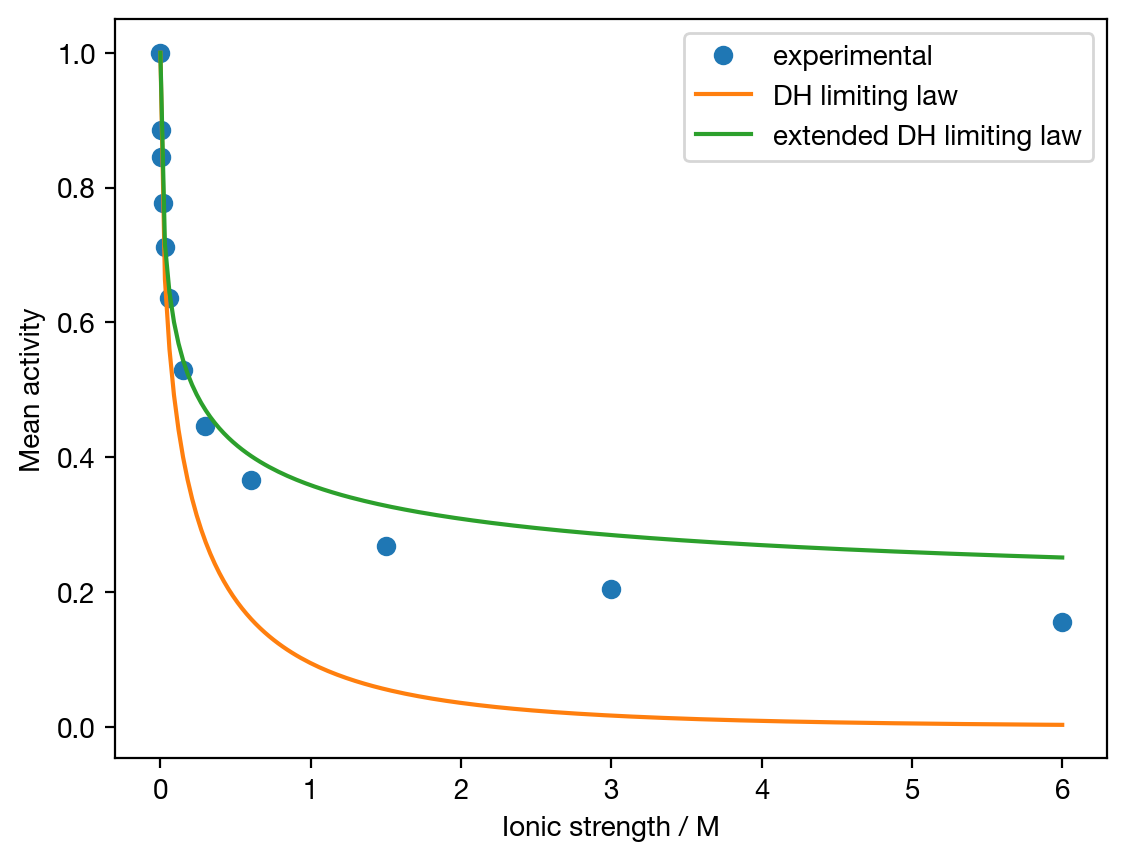

In [16]:
# Calculate revised theoretical activities
gamma_DH_extended = debye_huckel_extended(I_range, A, B, a0, z_plus, z_minus)

plt.plot(ionic_strength, mean_activity, 'o', label='experimental')
plt.plot(I_range, gamma_DH, '-', label='DH limiting law')
plt.plot(I_range, gamma_DH_extended, '-', label='extended DH limiting law')
plt.legend()
plt.xlabel('Ionic strength / M')
plt.ylabel('Mean activity')
plt.show()